#### -accuracy vs. Temp (and spread) for three categories of variables 

In [1]:
import os
import numpy as np
import pandas as pd
import glob
import json
# import sklearn.model_selection as ms
# from sklearn import metrics
# import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib
import time

In [2]:
# import matplotlib as mpl
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True
})


### For each spread, three different categories in one plot 

Text(0.5, 1.0, '$\\mathrm{H_2O}$')

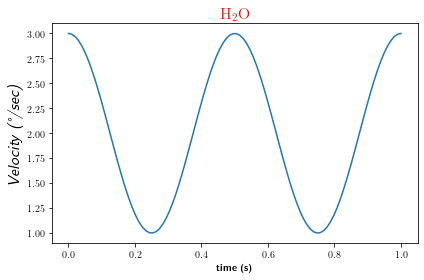

In [3]:
t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
# ax.set_title("$\<\\beta\>$", fontsize=16, color='r')
# ax.set_title(r'$\langle B_{\mathrm{e}} \rangle$', fontsize=16, color='r')
# ax.set_title("G + %s"%r'$\langle g(v) \rangle$', fontsize=16, color='r')
# ax.set_title("G + %s"%r'$\langle g(v) \rangle$', fontsize=16, color='r')

ax.set_title(r"$\mathrm{H_2O}$", fontsize=16, color='r')

In [4]:
### define features, legends and labels 


legend_label = {"g":"G", 
                "ab": "Abundance", 
                "topo":"Topology", 
                "g_ab": "G + Abundance", 
                "g_topo": "G + Topology", 
                'topo_ab':"Topology + Abundance", 
                'g_topo_ab': "G + Topology + Abundance",
                'degree': r'$\langle k \rangle$', 
                'cc': r'$\langle C \rangle$',
                'spl': r'$\langle \ell \rangle$' , 
                'neighbor': r'$\langle k_{nn} \rangle$',
                'betw': r'$\langle g(v) \rangle$', 
                'edgebetw': r'$\langle g(e) \rangle$',
                'g_degree': "G + %s"%r'$\langle k \rangle$',
                'g_cc': "G + %s"%r'$\langle C \rangle$', 
                'g_spl': "G + %s"%r'$\langle \ell \rangle$', 
                'g_neighbor': "G + %s"%r'$\langle k_{nn} \rangle$', 
                'g_betw': "G + %s"%r'$\langle g(v) \rangle$', 
                'g_edgebetw': "G + %s"%r'$\langle g(e) \rangle$', 
                "CH4": r"$\mathrm{CH}_4$", 
                "CO": r"$\mathrm{CO}$", 
                "H2O": r"$\mathrm{H_2O}$", 
                "NH3": r"$\mathrm{NH}_3$",
                'g_CO': "G + %s"%r"$\mathrm{CO}$", 
                'g_CH4': "G + %s"%r"$\mathrm{CH}_4$",
                'g_NH3': "G + %s"%r"$\mathrm{NH}_3$",
                'g_H2O': "G + %s"%r"$\mathrm{H_2O}$", 
                'CO_NH3': "%s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$"),
                'g_CO_NH3': "G + %s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$"),
                'spl_neighbor_betw_edgebetw': "%s + %s + %s + %s"%(r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$'), 
                'g_spl_neighbor_betw_edgebetw': "G + %s + %s + %s + %s"%(r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$'),
                'top_predictor': "G + %s + %s + %s + %s + %s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$", 
                                                                    r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$')
                }

individual_group = ['g', 'topo', 'ab']
group_combination = ['topo_ab', 'g_topo', 'g_ab']
three_group = ['g_topo_ab']
simple_topo = ['degree', 'cc']
complex_topo = ['spl', 'neighbor']
betweenness = ['betw', 'edgebetw']
g_individual_topology = ['g_degree','g_cc', 'g_spl', 'g_neighbor', 'g_betw', 'g_edgebetw']
individual_abundance = ["CH4", "CO", "H2O", "NH3"]
g_individual_abundance = ['g_CO', 'g_CH4','g_NH3','g_H2O']
individual_topology = simple_topo + complex_topo + betweenness
individual_features = ['g'] + individual_abundance + individual_topology
best_predictors = ['CO_NH3', 'spl_neighbor_betw_edgebetw','g_CO_NH3', 'g_spl_neighbor_betw_edgebetw','top_predictor']

In [ ]:
### directories
data_dir = "/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/"
dir_plot = "/Users/hkim78/work/HotJupiter/plot/atmosphere-uncertainty/machine_learning/2021/"


mean_temp = np.arange(400, 2100, 100)

In [25]:
# ### all variables 
# for spread in ["50", "250", "1000"]:
#     #params = {'tex.usetex': True}
#     plt.figure(figsize=(12, 6.8))
#     #plt.rc(usetex = True)
#     #plt.rcParams.update(params)
#     
#     for feature_group in legend_label.keys():
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         plt.plot(a[spread], label = legend_label[feature_group])
#     
#     #if spread == "50":
#     plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#     plt.ylim([0.0,1.05])
#     
#     plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
#     plt.yticks(fontsize= 10)
# 
#     plt.xlabel("Mean Temperature (K)", fontsize=12)
#     plt.ylabel("Accuracy", fontsize=12)
#     plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
#     plt.tight_layout()
# 
#     plt.savefig(dir_plot + "accuracy_spread_%s.png"%spread, dpi=200)
#     plt.savefig(dir_plot + "accuracy_spread_%s.pdf"%spread)
#     plt.show()
#     
#     
    #     
    # list_cc = ['#1E88E5', '#BB5566', '#228833']
    # 
    # plt.figure(figsize=(3.3, 2.7))
    # i = 0
    # for spread in ["50", "250", "1000"]:
    #     plt.plot(a[spread], label=spread, linewidth=2, color=list_cc[i])
    # 

    #     i += 1
    # 
    # 
    # plt.ylim([0.0,1.05])
    # # lines = plt.gca().get_lines()
    # # legend_spread = plt.legend([lines[i] for i in np.arange(0, 3)], ["50", "250", "1000"],
    # #                            prop={"size":5}, title='Spread', bbox_to_anchor=(0.0, 0.15, 0.3, 0.3))
    # legend_spread = plt.legend(prop={"size":7.5}, title='Spread')#, bbox_to_anchor=(0.05, 0.22, 0.32, 0.3))
    # plt.setp(legend_spread.get_title(), fontsize= 7.5)



In [26]:
# #individual_group + group_combination +three_group
# 
# for spread in ["50", "250", "1000"]:
#     #params = {'tex.usetex': True}
#     plt.figure(figsize=(6, 3))
#     #plt.rc(usetex = True)
#     #plt.rcParams.update(params)
#     
#     for feature_group in individual_group + group_combination + three_group:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         plt.plot(a[spread], label = legend_label[feature_group])
#     
#     #if spread == "50":
#     plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#     plt.ylim([0.0,1.05])
#     
#     plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
#     plt.yticks(fontsize= 10)
# 
#     plt.xlabel("Mean Temperature (K)", fontsize=12)
#     plt.ylabel("Accuracy", fontsize=12)
#     plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
#     plt.tight_layout()
# 
#     plt.savefig(dir_plot + "accuracy_spread_%s_groups.png"%spread, dpi=200)
#     plt.savefig(dir_plot + "accuracy_spread_%s_groups.pdf"%spread)
#     plt.show()

In [27]:

#simple_topo + complex_topo + betweenness

# for spread in ["50", "250", "1000"]:
#     #params = {'tex.usetex': True}
#     plt.figure(figsize=(5, 3))
#     #plt.rc(usetex = True)
#     #plt.rcParams.update(params)
# 
#     for feature_group in ['g'] + ['topo'] + simple_topo + complex_topo + betweenness:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         plt.plot(a[spread], label = legend_label[feature_group])
# 
#     #if spread == "50":
#     plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#     plt.ylim([0.0,1.05])
# 
#     plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
#     plt.yticks(fontsize= 10)
# 
#     plt.xlabel("Mean Temperature (K)", fontsize=12)
#     plt.ylabel("Accuracy", fontsize=12)
#     plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
#     plt.tight_layout()
# 
#     plt.savefig(dir_plot + "accuracy_spread_%s_topo.png"%spread, dpi=200)
#     plt.savefig(dir_plot + "accuracy_spread_%s_topo.pdf"%spread)
#     plt.show()

In [28]:

# individual_abundance
# 
# for spread in ["50", "250", "1000"]:
#     #params = {'tex.usetex': True}
#     plt.figure(figsize=(5.1, 3))
#     #plt.rc(usetex = True)
#     #plt.rcParams.update(params)
# 
#     for feature_group in ['g'] + ['ab'] + individual_abundance:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         plt.plot(a[spread], label = legend_label[feature_group])
# 
#     #if spread == "50":
#     plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#     plt.ylim([0.0,1.05])
# 
#     plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
#     plt.yticks(fontsize= 10)
# 
#     plt.xlabel("Mean Temperature (K)", fontsize=12)
#     plt.ylabel("Accuracy", fontsize=12)
#     plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
#     plt.tight_layout()
# 
#     plt.savefig(dir_plot + "accuracy_spread_%s_ab.png"%spread, dpi=200)
#     plt.savefig(dir_plot + "accuracy_spread_%s_ab.pdf"%spread)
#     plt.show()

In [29]:
# g + individual_abundance
# 
# for spread in ["50", "250", "1000"]:
#     #params = {'tex.usetex': True}
#     plt.figure(figsize=(5.1, 3))
#     #plt.rc(usetex = True)
#     #plt.rcParams.update(params)
# 
#     for feature_group in ['g'] + ['ab'] + g_individual_abundance:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         plt.plot(a[spread], label = legend_label[feature_group])
# 
#     #if spread == "50":
#     plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#     plt.ylim([0.0,1.05])
# 
#     plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
#     plt.yticks(fontsize= 10)
# 
#     plt.xlabel("Mean Temperature (K)", fontsize=12)
#     plt.ylabel("Accuracy", fontsize=12)
#     plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
#     plt.tight_layout()
# 
#     plt.savefig(dir_plot + "accuracy_spread_%s_gibbs_ab.png"%spread, dpi=200)
#     plt.savefig(dir_plot + "accuracy_spread_%s_gibbs_ab.pdf"%spread)
#     plt.show()

In [30]:
# g + individual_topology

# for spread in ["50", "250", "1000"]:
#     #params = {'tex.usetex': True}
#     plt.figure(figsize=(5.1, 3))
#     #plt.rc(usetex = True)
#     #plt.rcParams.update(params)
# 
#     for feature_group in ['g'] + ['topo'] + g_individual_topology:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         plt.plot(a[spread], label = legend_label[feature_group])
# 
#     #if spread == "50":
#     plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#     plt.ylim([0.0,1.05])
# 
#     plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
#     plt.yticks(fontsize= 10)
# 
#     plt.xlabel("Mean Temperature (K)", fontsize=12)
#     plt.ylabel("Accuracy", fontsize=12)
#     plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
#     plt.tight_layout()
# 
#     plt.savefig(dir_plot + "accuracy_spread_%s_gibbs_topo.png"%spread, dpi=200)
#     plt.savefig(dir_plot + "accuracy_spread_%s_gibbs_topo.pdf"%spread)
#     plt.show()



/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_CH4.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_CO.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_H2O.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_NH3.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_degree.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_cc.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_spl.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_neighbor.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_betw.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_edgebetw.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_CH4.json
/Users/hkim78/work/HotJupiter/ML/results/ac

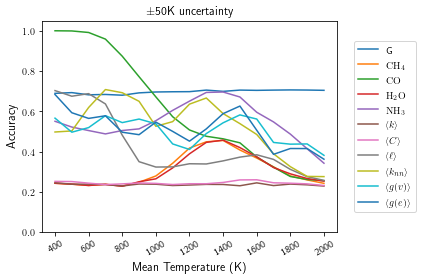

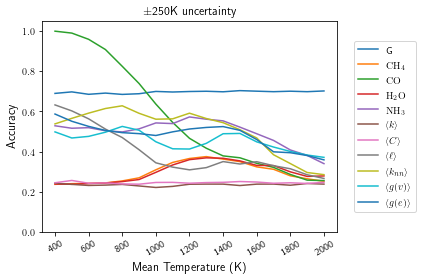

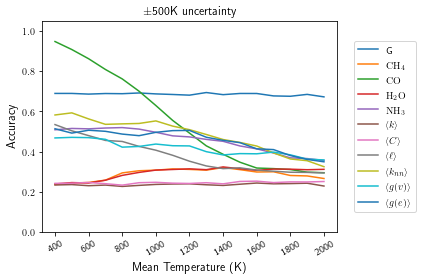

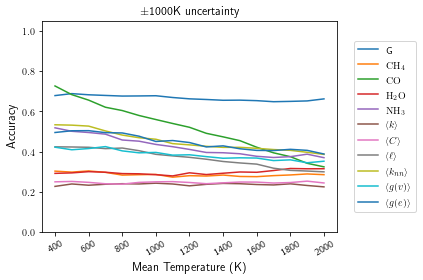

In [39]:
### all individual variables 
for spread in ["50", "250", "500", "1000"]:
    #params = {'tex.usetex': True}
    plt.figure(figsize=(6, 4))
    #plt.rc(usetex = True)
    #plt.rcParams.update(params)

    for feature_group in individual_features:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        plt.plot(a[spread], label = legend_label[feature_group])

    #if spread == "50":
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
    plt.ylim([0.0,1.05])

    plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
    plt.yticks(fontsize= 10)

    plt.xlabel("Mean Temperature (K)", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
    plt.tight_layout()

    plt.savefig(dir_plot + "/png-files/accuracy_spread_%s_all_individual_var.png"%spread, dpi=200)
    plt.savefig(dir_plot + "/pdf-files/accuracy_spread_%s_all_individual_var.pdf"%spread)
    plt.show()

/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_CO.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_NH3.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_spl.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_neighbor.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_betw.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_edgebetw.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_CO.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_NH3.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_spl.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_neighbor.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_betw.json
/Users/hkim78/work

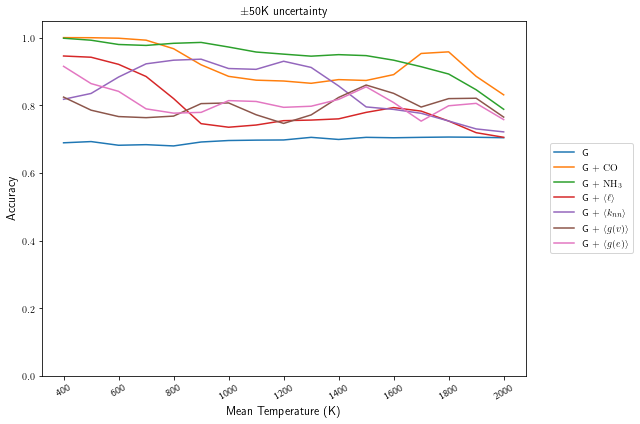

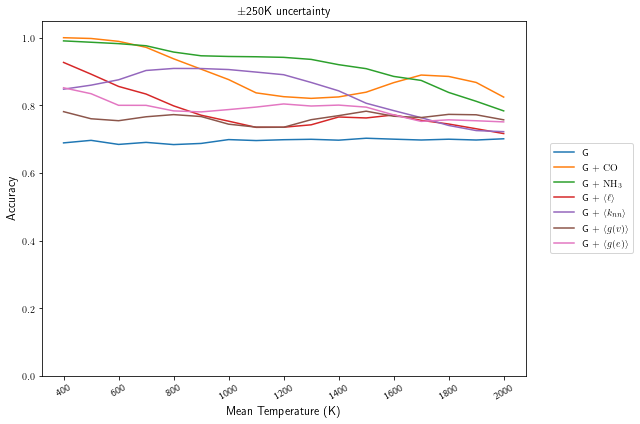

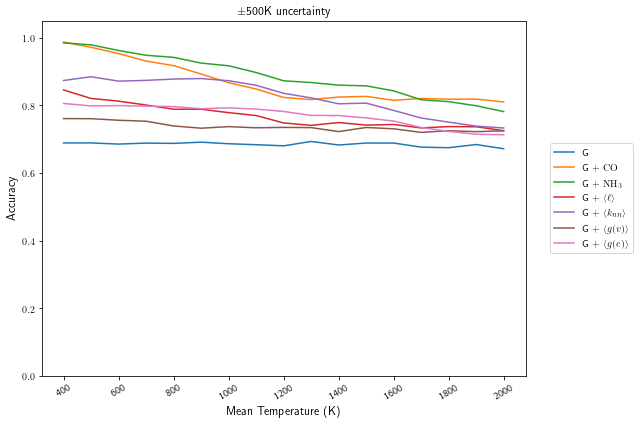

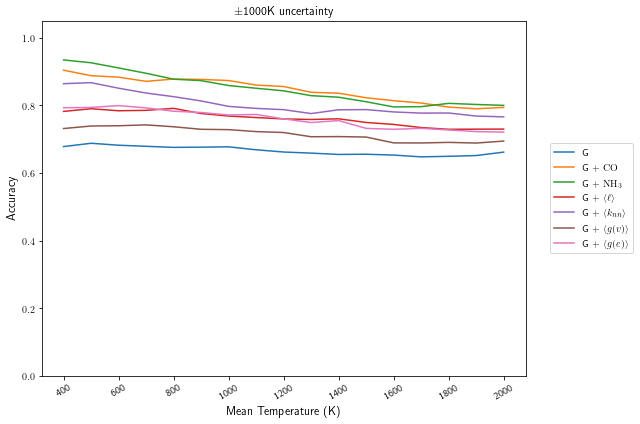

In [32]:
for spread in ["50", "250", "500", "1000"]:
    #params = {'tex.usetex': True}
    plt.figure(figsize=(9, 6))
    #plt.rc(usetex = True)
    #plt.rcParams.update(params)

    for feature_group in ['g', 'g_CO', 'g_NH3', 'g_spl', 'g_neighbor', 'g_betw', 'g_edgebetw']:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        plt.plot(a[spread], label = legend_label[feature_group])

    #if spread == "50":
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
    plt.ylim([0.0,1.05])

    plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
    plt.yticks(fontsize= 10)

    plt.xlabel("Mean Temperature (K)", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
    plt.tight_layout()

    plt.savefig(dir_plot + "/png-files/accuracy_spread_%s_g_best_ind.png"%spread, dpi=200)
    plt.savefig(dir_plot + "/pdf-files/accuracy_spread_%s_g_best_ind.pdf"%spread)
    plt.show()

/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_CO_NH3.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_spl_neighbor_betw_edgebetw.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_CO_NH3.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_spl_neighbor_betw_edgebetw.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_top_predictor.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_CO_NH3.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_spl_neighbor_betw_edgebetw.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_CO_NH3.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g_spl_neighbor_betw_edgebetw.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_top_predictor.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_CO_NH3.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accurac

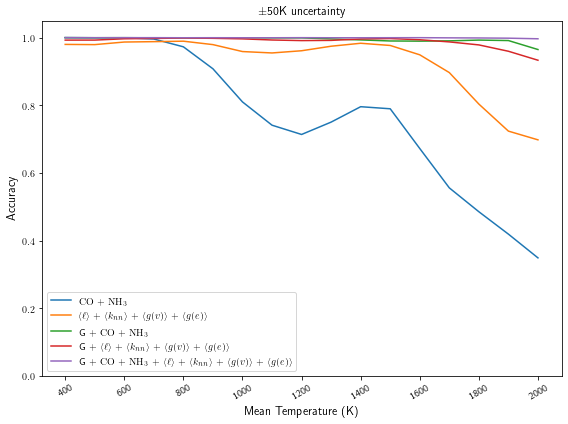

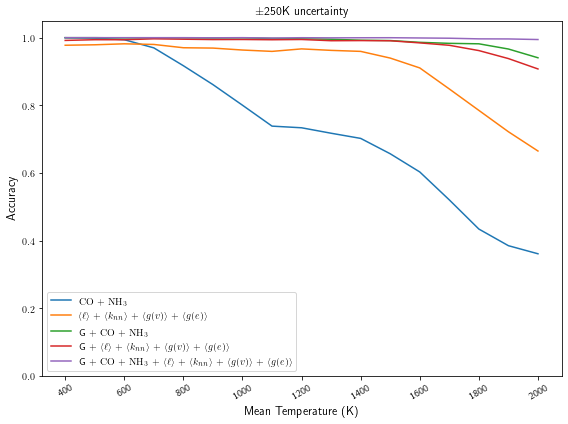

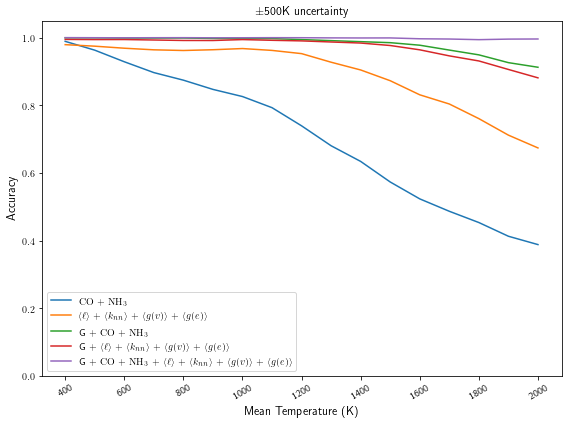

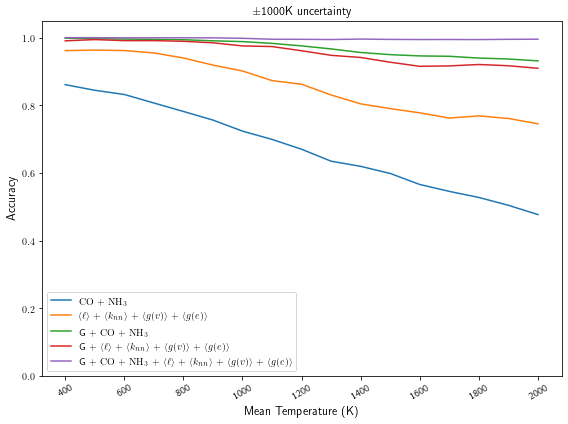

In [35]:
for spread in ["50", "250", "500", "1000"]:
    #params = {'tex.usetex': True}
    plt.figure(figsize=(8, 6))
    #plt.rc(usetex = True)
    #plt.rcParams.update(params)

    for feature_group in best_predictors:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        plt.plot(a[spread], label = legend_label[feature_group])

    #if spread == "50":
    #plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
    plt.legend(fontsize=10)
    plt.ylim([0.0,1.05])

    plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
    plt.yticks(fontsize= 10)

    plt.xlabel("Mean Temperature (K)", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
    plt.tight_layout()

    plt.savefig(dir_plot + "/png-files/accuracy_spread_%s_best_predictors.png"%spread, dpi=200)
    plt.savefig(dir_plot + "/pdf-files/accuracy_spread_%s_best_predictors.pdf"%spread)
    plt.show()


In [14]:

### grouped individual 
for spread in ["50"]:#, "250", "500", "1000"]:
    #params = {'tex.usetex': True}
    plt.figure(figsize=(8, 15), sharex = True, sharey = True)
    #plt.rc(usetex = True)
    #plt.rcParams.update(params)

    plt.subplot(2, 2, 1)
    for feature_group in ['g']:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        plt.plot(a[spread], label = legend_label[feature_group])
        plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
        plt.ylim([0.0,1.05])
        

    plt.subplot(2, 2, 2)
    for feature_group in individual_abundance:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        plt.plot(a[spread], label = legend_label[feature_group])
        plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
        plt.ylim([0.0,1.05])
    
    
    plt.subplot(2, 2, 3)
    for feature_group in simple_topo:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        plt.plot(a[spread], label = legend_label[feature_group])        
        plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
        plt.ylim([0.0,1.05])

    
    plt.subplot(2, 2, 4)
    for feature_group in complex_topo + betweenness:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        plt.plot(a[spread], label = legend_label[feature_group])        
        plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
        plt.ylim([0.0,1.05])

    # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
    # plt.ylim([0.0,1.05])
    # 
    # plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
    # plt.yticks(fontsize= 10)

    plt.xlabel("Mean Temperature (K)", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
    plt.tight_layout()

    plt.savefig(dir_plot + "/png-files/accuracy_spread_%s_individual_category.png"%spread, dpi=200)
    plt.savefig(dir_plot + "/pdf-files/accuracy_spread_%s_individual_category.pdf"%spread)
    plt.show()

TypeError: __init__() got an unexpected keyword argument 'sharex'

/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_g.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_CH4.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_CO.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_H2O.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_NH3.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_degree.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_cc.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_spl.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_neighbor.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_betw.json
/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/accuracy_edgebetw.json


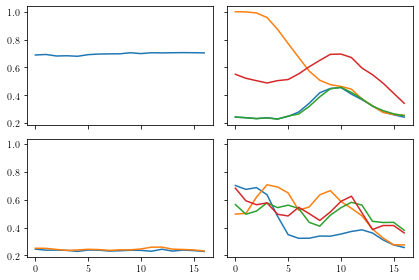

In [17]:

### grouped individual 



# for spread in ["50"]:#, "250", "500", "1000"]:
#     #params = {'tex.usetex': True}
#     fig, ax = plt.subplots(2, 2,  sharex = True, sharey = True)
#     #plt.rc(usetex = True)
#     #plt.rcParams.update(params)
# 
#     #plt.subplot(2, 2, 1)
#     for feature_group in ['g']:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[0, 0].plot(a[spread], label = legend_label[feature_group])
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
#         
# 
#     #plt.subplot(2, 2, 2)
#     for feature_group in individual_abundance:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[0, 1].plot(a[spread], label = legend_label[feature_group])
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
#     
#     
#     #plt.subplot(2, 2, 3)
#     for feature_group in simple_topo:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[1, 0].plot(a[spread], label = legend_label[feature_group])        
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
#     
#     #plt.subplot(2, 2, 4)
#     for feature_group in complex_topo + betweenness:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[1, 1].plot(a[spread], label = legend_label[feature_group])        
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
#     # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#     # plt.ylim([0.0,1.05])
#     # 
#     # plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
#     # plt.yticks(fontsize= 10)
# 
#     # plt.xlabel("Mean Temperature (K)", fontsize=12)
#     # plt.ylabel("Accuracy", fontsize=12)
#     # plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
#     plt.tight_layout()
# 
#     plt.savefig(dir_plot + "/png-files/accuracy_spread_%s_individual_category.png"%spread, dpi=200)
#     plt.savefig(dir_plot + "/pdf-files/accuracy_spread_%s_individual_category.pdf"%spread)
#     plt.show()

In [ ]:
## grouped individual 



# for spread in ["50"]:#, "250", "500", "1000"]:
#     #params = {'tex.usetex': True}
#     fig, ax = plt.subplots(2, 2,  sharex = True, sharey = True)
#     #plt.rc(usetex = True)
#     #plt.rcParams.update(params)
# 
#     #plt.subplot(2, 2, 1)
#     for feature_group in ['g']:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[0, 0].plot(a[spread], label = legend_label[feature_group])
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
# 
#     #plt.subplot(2, 2, 2)
#     for feature_group in individual_abundance:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[0, 1].plot(a[spread], label = legend_label[feature_group])
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
# 
#     #plt.subplot(2, 2, 3)
#     for feature_group in simple_topo:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[1, 0].plot(a[spread], label = legend_label[feature_group])        
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
# 
#     #plt.subplot(2, 2, 4)
#     for feature_group in complex_topo + betweenness:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[1, 1].plot(a[spread], label = legend_label[feature_group])        
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
#     # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#     # plt.ylim([0.0,1.05])
#     # 
#     # plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
#     # plt.yticks(fontsize= 10)
# 
#     # plt.xlabel("Mean Temperature (K)", fontsize=12)
#     # plt.ylabel("Accuracy", fontsize=12)
#     # plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
#     plt.tight_layout()
# 
#     plt.savefig(dir_plot + "/png-files/accuracy_spread_%s_individual_category.png"%spread, dpi=200)
#     plt.savefig(dir_plot + "/pdf-files/accuracy_spread_%s_individual_category.pdf"%spread)
#     plt.show()

In [ ]:
# for spread in ["50"]:#, "250", "500", "1000"]:
#     #params = {'tex.usetex': True}
#     fig, ax = plt.subplots(2, 2,  sharex = True, sharey = True)
#     #plt.rc(usetex = True)
#     #plt.rcParams.update(params)
# 
#     #plt.subplot(2, 2, 1)
#     for feature_group in ['g']:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[0, 0].plot(a[spread], label = legend_label[feature_group])
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
# 
#     #plt.subplot(2, 2, 2)
#     for feature_group in individual_abundance:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[0, 1].plot(a[spread], label = legend_label[feature_group])
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
# 
#     #plt.subplot(2, 2, 3)
#     for feature_group in simple_topo:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[1, 0].plot(a[spread], label = legend_label[feature_group])        
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
# 
#     #plt.subplot(2, 2, 4)
#     for feature_group in complex_topo + betweenness:
#         input_path = data_dir + "accuracy_%s.json"%feature_group
#         print(input_path)
#         with open(input_path) as infile:
#             a = json.load(infile)
# 
#         ax[1, 1].plot(a[spread], label = legend_label[feature_group])        
#         # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#         # plt.ylim([0.0,1.05])
# 
#     # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
#     # plt.ylim([0.0,1.05])
#     # 
#     # plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
#     # plt.yticks(fontsize= 10)
# 
#     # plt.xlabel("Mean Temperature (K)", fontsize=12)
#     # plt.ylabel("Accuracy", fontsize=12)
#     # plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
#     plt.tight_layout()
# 
#     plt.savefig(dir_plot + "/png-files/accuracy_spread_%s_individual_category.png"%spread, dpi=200)
#     plt.savefig(dir_plot + "/pdf-files/accuracy_spread_%s_individual_category.pdf"%spread)
#     plt.show()

### matrix plots


In [ ]:
for spread in ["50"]:#, "250", "500", "1000"]:
    #params = {'tex.usetex': True}
    fig, ax = plt.subplots(3, 4,  sharex = True, sharey = True)
    #plt.rc(usetex = True)
    #plt.rcParams.update(params)

    #plt.subplot(2, 2, 1)
    for feature_group in ['g']:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        ax[0, 0].plot(a[spread], label = legend_label[feature_group])
        # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
        # plt.ylim([0.0,1.05])


    #plt.subplot(2, 2, 2)
    for feature_group in individual_abundance:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        ax[0, 1].plot(a[spread], label = legend_label[feature_group])
        # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
        # plt.ylim([0.0,1.05])


    #plt.subplot(2, 2, 3)
    for feature_group in simple_topo:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        ax[1, 0].plot(a[spread], label = legend_label[feature_group])        
        # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
        # plt.ylim([0.0,1.05])


    #plt.subplot(2, 2, 4)
    for feature_group in complex_topo + betweenness:
        input_path = data_dir + "accuracy_%s.json"%feature_group
        print(input_path)
        with open(input_path) as infile:
            a = json.load(infile)

        ax[1, 1].plot(a[spread], label = legend_label[feature_group])        
        # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
        # plt.ylim([0.0,1.05])

    # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=10)
    # plt.ylim([0.0,1.05])
    # 
    # plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
    # plt.yticks(fontsize= 10)

    # plt.xlabel("Mean Temperature (K)", fontsize=12)
    # plt.ylabel("Accuracy", fontsize=12)
    # plt.title(r"$\pm$%sK uncertainty"%spread, fontsize=12)
    plt.tight_layout()

    plt.savefig(dir_plot + "/png-files/accuracy_spread_%s_individual_category.png"%spread, dpi=200)
    plt.savefig(dir_plot + "/pdf-files/accuracy_spread_%s_individual_category.pdf"%spread)
    plt.show()